# Problem Sheet 1

In [ ]:
# import packages
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#gamma is an adavantage paramenter
#prrof by induction for b, 

# Polya urn models
Discrete time experiment: 
- initally there are k balls (each unique colour).
- At each time step, draw one ball uniformaly at random and then replace two balls of that colour. 

Transition probability: 

$$p(\underline{x} + e_i | \underline{x}) = \frac{f_i x_i^\gamma}{\sum_{j=1}^{k} f_j x_j^\gamma} $$

In [ ]:
#uniform probability (f_i = 1 and γ = 1)

k = 500
X0 = np.ones(k)
T = 5000
XN = np.ones((T, k))

current_state = []
current_state.extend(range(k))
for j in range(1,T):
    r = np.random.randint(0,len(current_state)-1) # random is inclusive [a,b] but remember python indexes from 0 to k-1
    newBall = current_state[r]
    XN[j:,newBall] = XN[j-1,newBall]+1
    current_state.append(newBall)

In [ ]:
XN.sort(axis =1) #try without this

In [ ]:
plt.figure(figsize = (5,5))
pcm = sns.heatmap(XN,cbar_kws={'label': r'Number of Balls'})
pcm.figure.axes[-1].yaxis.label.set_size(16)
plt.ylabel('Time step', fontsize = 20)
plt.xlabel('Colour, k', fontsize = 20)
plt.title('Polya urn', fontsize = 22)


In [ ]:
#fitness probability with reinforcement paramter


k = 500
X0 = np.ones(k)
gamma = 1.5
fitness = np.ones(k)
T = [5000,6000,7000]
i = (0,1,2)
for i in T: 
    XN = np.ones((T[i], k))

    current_state = []
    current_state.extend(range(k))
    for j in range(1,T):
        denominator = sum([fitness[kk]*(kk)**gamma for kk in current_state])
        selection_prob = [fitness[kk]*(kk)**gamma/denominator for kk in current_state]
        r = np.random.choice(len(current_state), p = selection_prob) #non uniform random choice from range(len(current))
        newBall = current_state[r]
        XN[j:,newBall] = XN[j-1,newBall]+1
        current_state.append(newBall)
    XN.sort(axis =1) #try without this

In [ ]:
# plt.figure(figsize = (5,5))
# pcm = sns.heatmap(XN,cbar_kws={'label': r'Number of Balls'})
# pcm.figure.axes[-1].yaxis.label.set_size(16)
# plt.ylabel('Time step', fontsize = 20)
# plt.xlabel('Colour, k', fontsize = 20)
# plt.title('Polya urn', fontsize = 22)


# Empirical Tail Distributions

Empirical CDF: https://www.statsmodels.org/devel/generated/statsmodels.distributions.empirical_distribution.ECDF.html

In [ ]:
from statsmodels.distributions.empirical_distribution import ECDF

In [ ]:
def one_cdf(data_t):

    data_size=len(data_t)

    # Set bins edges
    data_set=sorted(set(data_t))
    bins=np.append(data_set, data_set[-1]+1)

    # Use the histogram function to bin the data
    counts, bin_edges = np.histogram(data_t, bins=bins, density=False)

    counts=counts.astype(float)/data_size

    # Find the cdf
    cdf = np.cumsum(counts)
    return bin_edges[0:-1], np.ones(len(cdf))-cdf

In [ ]:
ecdf_XN = ECDF(XN[T-1,:]) # class so have to dot to get values
#gamma  = 1 linear log-og
#gamma > 1 log-lin
#gamma < 1 linear lin,lin
bins, tail = one_cdf(XN[T-1,:])
# ecdf_XN.x = (ecdf_XN.x)/(T+k)
# print(ecdf_XN.x)

In [ ]:
plt.figure(figsize=(10,10))
#plt.plot(bins, tail,linestyle='--', marker="o",ms = 4, color='r',label = 'T={}'.format(T))
plt.plot(ecdf_XN.x, np.ones(len(ecdf_XN.y))-ecdf_XN.y, linestyle='--', marker="o",ms = 4, color='b',label = 'T={}'.format(T))
#plt.yscale('log')
plt.xscale('log')
plt.legend()
plt.ylabel("1-CDF, log scale")
plt.title(r'$k = {}, γ = {}, f_i = {}, X_i(0) = 1$'.format(k, gamma, fitness[0]))
plt.xlabel('x, log scale')
plt.grid(True)

# Notes: Gershgorin disk theorem

Given a matrix $A \in \mathbb{R}^{n \times n}$, the Gershgorin disk theorem stats that all eigenvalues lie in a least one Gershogorin disk,

$D_i$ is a disk centered on $a_{i,i}$ with radius $R_i = \sum_{j \neq i} a_{i,j}$.

In [ ]:
def plot_circle(center,radius): # Function to plot a circle
    x=np.linspace(-1,1,500)
    x*=radius
    x+=center
    y=np.sqrt(radius**2-(x-center)**2)
    plt.plot(x,y,'r-',lw=3)
    plt.plot(x,-1*y,'r-',lw=3)

Consider a random walk, with 4 states with periodic BC

In [ ]:
p=0.3
q=0.7
A=np.array([[0,p,0,0,q],[q,0,p,0,0],[0,q,0,p,0],[0,0,q,0,p],[p,0,0,q,0]])
print(A)

centers=[]
radii=[]

N=A.shape[0]
for i in range(N):
    centers.append(A[i,i])
    temp=0.0
    for j in range(N):
        if j!=i:
            temp+=A[i,j]
    radii.append(temp)

evals,evecs=np.linalg.eig(A)

In [ ]:
plt.figure(figsize = (5,5))
for i in range(N):
    plot_circle(centers[i],radii[i]) # Plot disk i
    plt.plot(np.real(evals[i]),np.imag(evals[i]),'kx',mew=3,ms=10) # Plot evalue i
lim=1.1
plt.xlim(-lim,lim)
plt.ylim(-lim,lim)
plt.grid()



In [ ]:
print(evals)
print ('\n eigenvectors', evecs.T)

Lazy random walk:

In [ ]:
eps=0.1
p=0.3
q=1-p-eps
A=np.array([[eps,p,0,q],[q,eps,p,0],[0,q,eps,p],[p,0,q,eps]])
print(A)

centers=[]
radii=[]

N=A.shape[0]
for i in range(N):
    centers.append(A[i,i])
    temp=0.0
    for j in range(N):
        if j!=i:
            temp+=A[i,j]
    radii.append(temp)

evals,evecs=np.linalg.eig(A)

In [ ]:
plt.figure(figsize = (5,5))
for i in range(N):
    plot_circle(centers[i],radii[i]) # plot disk i
    plt.plot(np.real(evals[i]),np.imag(evals[i]),'kx',mew=3,ms=10) #plot evalue i
lim=1.1
plt.xlim(-lim,lim)
plt.ylim(-lim,lim)
plt.grid()

In [4]:
from statsmodels.distributions.empirical_distribution import ECDF
import numpy as np
import matplotlib.pyplot as plt 

# gamma = 0, not normalised

In [ ]:
k = 500
X0 = np.ones(k)
gamma = 0
fitness = np.ones(k)
T = [5000,20000,80000]
XN = np.ones((T[0], k))
current_state = []
current_state.extend(range(k))
for j in range(1,T[0]):
    denominator = sum([fitness[kk]*(kk)**gamma for kk in current_state])
    selection_prob = [fitness[kk]*(kk)**gamma/denominator for kk in current_state]
    r = np.random.choice(len(current_state), p = selection_prob) #non uniform random choice from range(len(current))
    newBall = current_state[r]
    XN[j:,newBall] = XN[j-1,newBall]+1
    current_state.append(newBall)
    XN.sort(axis =1) #try without this

ecdf_XN0 = ECDF(XN[T[0]-1,:]) # class so have to dot to get values
#gamma  = 1 linear log-og
#gamma > 1 log-lin
#gamma < 1 linear lin,lin
# ecdf_XN.x = (ecdf_XN.x)/(T+k)
# print(ecdf_XN.x)
XN = np.ones((T[1], k))
current_state = []
current_state.extend(range(k))
for j in range(1,T[1]):
    denominator = sum([fitness[kk]*(kk)**gamma for kk in current_state])
    selection_prob = [fitness[kk]*(kk)**gamma/denominator for kk in current_state]
    r = np.random.choice(len(current_state), p = selection_prob) #non uniform random choice from range(len(current))
    newBall = current_state[r]
    XN[j:,newBall] = XN[j-1,newBall]+1
    current_state.append(newBall)
    XN.sort(axis =1) #try without this

ecdf_XN1 = ECDF(XN[T[1]-1,:])


XN = np.ones((T[2], k))
current_state = []
current_state.extend(range(k))
for j in range(1,T[2]):
    denominator = sum([fitness[kk]*(kk)**gamma for kk in current_state])
    selection_prob = [fitness[kk]*(kk)**gamma/denominator for kk in current_state]
    r = np.random.choice(len(current_state), p = selection_prob) #non uniform random choice from range(len(current))
    newBall = current_state[r]
    XN[j:,newBall] = XN[j-1,newBall]+1
    current_state.append(newBall)
    XN.sort(axis =1) #try without this

ecdf_XN2 = ECDF(XN[T[2]-1,:])

#plt.plot(bins, tail,linestyle='--', marker="o",ms = 4, color='r',label = 'T={}'.format(T))

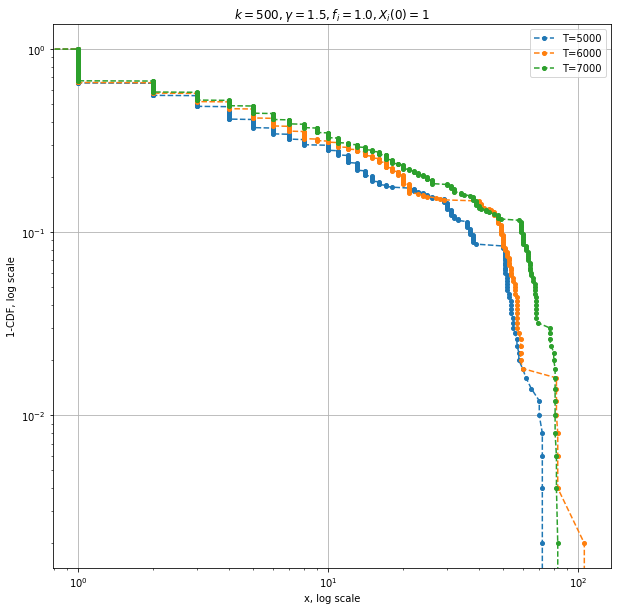

In [13]:
plt.figure(figsize=(10,10))
plt.plot(ecdf_XN0.x, np.ones(len(ecdf_XN0.y))-ecdf_XN0.y, linestyle='--', marker="o",ms = 4,label = 'T={}'.format(T[0]))
plt.plot(ecdf_XN1.x, np.ones(len(ecdf_XN1.y))-ecdf_XN1.y, linestyle='--', marker="o",ms = 4,label = 'T={}'.format(T[1]))
plt.plot(ecdf_XN2.x, np.ones(len(ecdf_XN2.y))-ecdf_XN2.y, linestyle='--', marker="o",ms = 4,label = 'T={}'.format(T[2]))
plt.yscale('log')
plt.xscale('log')
plt.legend()
plt.ylabel("1-CDF, log scale")
plt.title(r'$k = {}, γ = {}, f_i = {}, X_i(0) = 1$'.format(k, gamma, fitness[0]))
plt.xlabel('x, log scale')
plt.grid(True)